In [24]:
from pathlib import Path
import os
import sys

sys.path.append(Path(os.path.abspath('')).parent.parent)
os.chdir(Path(os.path.abspath('')).parent.parent)

import numpy as np
import pandas as pd 
import xarray as xr
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import config.settings as cset

In [49]:
tas_new_df = pd.read_csv(Path.joinpath(cset.path_GDP, '2408_countrylevel_total.csv'), index_col=0)
tas_old_df = pd.read_csv("/Users/schoens/Documents/Projekte/Econ/Data/BHM_v1/2310_countrylevel_total.csv", index_col = 0)

In [50]:
tas_df = pd.concat([tas_old_df[~tas_old_df.run.str.contains('Ref')], 
                    tas_new_df[~tas_new_df.run.str.contains('Refv2')]])

tas_df.run = [f.replace('Refv2', 'Ref') for f in tas_df.run]

In [51]:
tas_df.to_csv(Path.joinpath(cset.path_GDP, '2408-adj_countrylevel_total.csv'))

In [53]:
# adjusting GDP data: 
gdp_new_df = pd.read_csv("/Users/schoens/Documents/Projekte/Econ/Data/BHM/2408 Full Data BHM Main Result.csv")
gdp_old_df = pd.read_csv("/Users/schoens/Documents/Projekte/Econ/Data/BHM_v1/Full Data BHM Main Result.csv")

In [54]:
gdp_old_df

,iso,year,realisation,scen,run,SSP1_g,SSP2_g,SSP3_g,SSP4_g,SSP5_g,...,SSP1,SSP2,SSP3,SSP4,SSP5,diff_SSP1,diff_SSP2,diff_SSP3,diff_SSP4,diff_SSP5
0,AFG,2015,1,CurPol,1,1.019348,1.019974,1.020848,1.020793,1.018848,...,1347.674813,1347.681378,1347.690007,1347.676420,1347.699113,1.000000,1.000000,1.000000,1.000000,1.000000
1,AFG,2015,1,CurPol,2,1.019348,1.019974,1.020848,1.020793,1.018848,...,1347.674813,1347.681378,1347.690007,1347.676420,1347.699113,1.000000,1.000000,1.000000,1.000000,1.000000
2,AFG,2015,1,CurPol,3,1.019348,1.019974,1.020848,1.020793,1.018848,...,1347.674813,1347.681378,1347.690007,1347.676420,1347.699113,1.000000,1.000000,1.000000,1.000000,1.000000
3,AFG,2015,1,CurPol,4,1.019348,1.019974,1.020848,1.020793,1.018848,...,1347.674813,1347.681378,1347.690007,1347.676420,1347.699113,1.000000,1.000000,1.000000,1.000000,1.000000
4,AFG,2015,1,CurPol,5,1.019348,1.019974,1.020848,1.020793,1.018848,...,1347.674813,1347.681378,1347.690007,1347.676420,1347.699113,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13501995,ZWE,2100,1,ssp534-over,96,1.028879,1.034367,1.027037,1.026624,1.034257,...,49879.371014,33073.686961,10493.927325,8331.685051,84706.589006,0.400191,0.396659,0.394371,0.393500,0.399912
13501996,ZWE,2100,1,ssp534-over,97,1.028879,1.034367,1.027037,1.026624,1.034257,...,49879.371014,33073.686961,10493.927325,8331.685051,84706.589006,1.005916,1.002097,1.009251,1.009704,0.999463
13501997,ZWE,2100,1,ssp534-over,98,1.028879,1.034367,1.027037,1.026624,1.034257,...,49879.371014,33073.686961,10493.927325,8331.685051,84706.589006,0.434800,0.431720,0.429771,0.428936,0.434090
13501998,ZWE,2100,1,ssp534-over,99,1.028879,1.034367,1.027037,1.026624,1.034257,...,49879.371014,33073.686961,10493.927325,8331.685051,84706.589006,0.516001,0.512406,0.511393,0.510692,0.514892


In [57]:
np.unique(gdp_old_df.scen)

array(['CurPol', 'GS', 'LD', 'ModAct', 'Neg', 'Ref1p5', 'Ren', 'SP',
       'ssp119', 'ssp534-over'], dtype=object)

In [61]:
gdp_df = pd.concat([gdp_old_df[~gdp_old_df.scen.str.contains('Ref1p5')], 
                    gdp_new_df[gdp_new_df.scen.str.contains('Ref1p5')]])

# gdp_df.run = [f.replace('Refv2', 'Ref') for f in tas_df.run]

In [62]:
gdp_df

,iso,year,realisation,scen,run,SSP1_g,SSP2_g,SSP3_g,SSP4_g,SSP5_g,...,SSP1,SSP2,SSP3,SSP4,SSP5,diff_SSP1,diff_SSP2,diff_SSP3,diff_SSP4,diff_SSP5
0,AFG,2015,1,CurPol,1,1.019348,1.019974,1.020848,1.020793,1.018848,...,1347.674813,1347.681378,1347.690007,1347.676420,1347.699113,1.000000,1.000000,1.000000,1.000000,1.000000
1,AFG,2015,1,CurPol,2,1.019348,1.019974,1.020848,1.020793,1.018848,...,1347.674813,1347.681378,1347.690007,1347.676420,1347.699113,1.000000,1.000000,1.000000,1.000000,1.000000
2,AFG,2015,1,CurPol,3,1.019348,1.019974,1.020848,1.020793,1.018848,...,1347.674813,1347.681378,1347.690007,1347.676420,1347.699113,1.000000,1.000000,1.000000,1.000000,1.000000
3,AFG,2015,1,CurPol,4,1.019348,1.019974,1.020848,1.020793,1.018848,...,1347.674813,1347.681378,1347.690007,1347.676420,1347.699113,1.000000,1.000000,1.000000,1.000000,1.000000
4,AFG,2015,1,CurPol,5,1.019348,1.019974,1.020848,1.020793,1.018848,...,1347.674813,1347.681378,1347.690007,1347.676420,1347.699113,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13501595,ZWE,2100,1,Ref1p5,96,1.028879,1.034367,1.027037,1.026624,1.034257,...,49879.371014,33073.686961,10493.927325,8331.685051,84706.589006,0.573935,0.569809,0.569379,0.568720,0.572413
13501596,ZWE,2100,1,Ref1p5,97,1.028879,1.034367,1.027037,1.026624,1.034257,...,49879.371014,33073.686961,10493.927325,8331.685051,84706.589006,0.537352,0.533149,0.532228,0.531525,0.536293
13501597,ZWE,2100,1,Ref1p5,98,1.028879,1.034367,1.027037,1.026624,1.034257,...,49879.371014,33073.686961,10493.927325,8331.685051,84706.589006,0.916939,0.911956,0.917433,0.917680,0.912008
13501598,ZWE,2100,1,Ref1p5,99,1.028879,1.034367,1.027037,1.026624,1.034257,...,49879.371014,33073.686961,10493.927325,8331.685051,84706.589006,0.882231,0.878317,0.883450,0.883627,0.877395


In [63]:
gdp_df.reset_index().to_csv("/Users/schoens/Documents/Projekte/Econ/Data/BHM/2408-adj Full Data BHM Main Result.csv")

ssp119


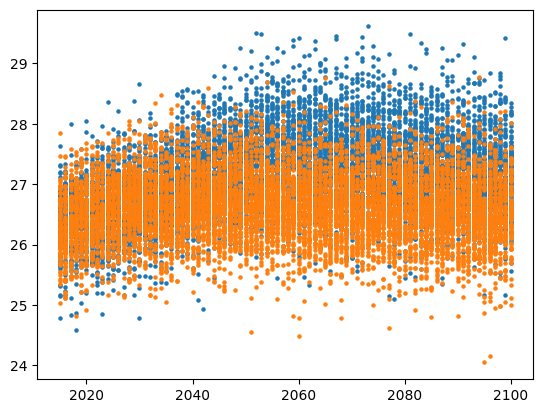

SP


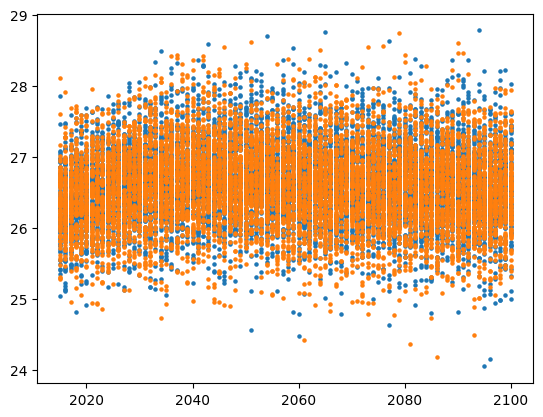

Neg


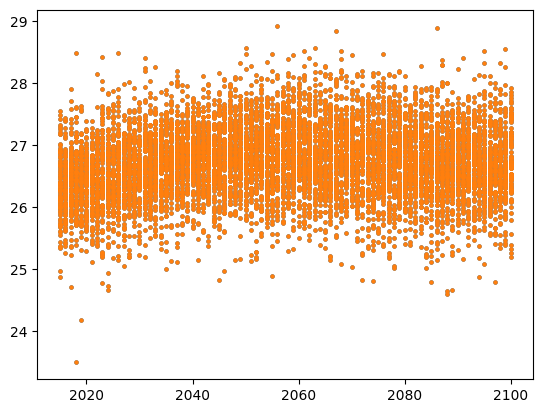

LD


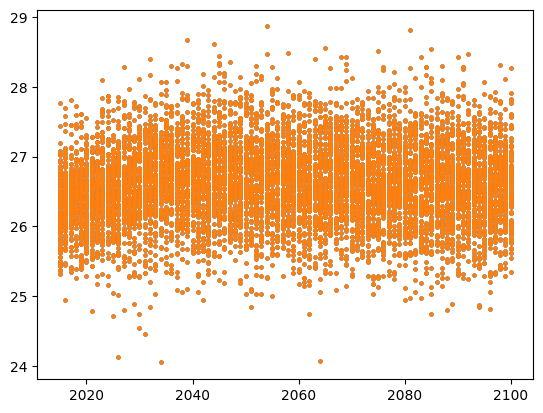

Ren


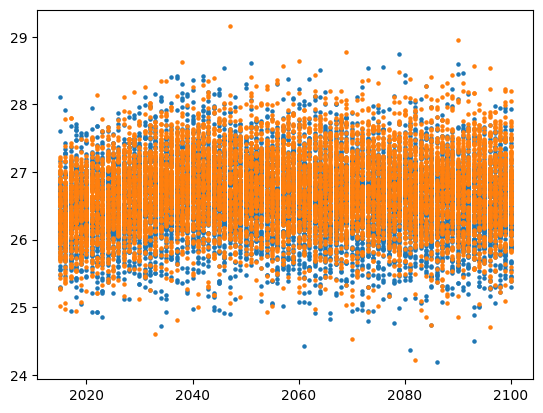

Ref


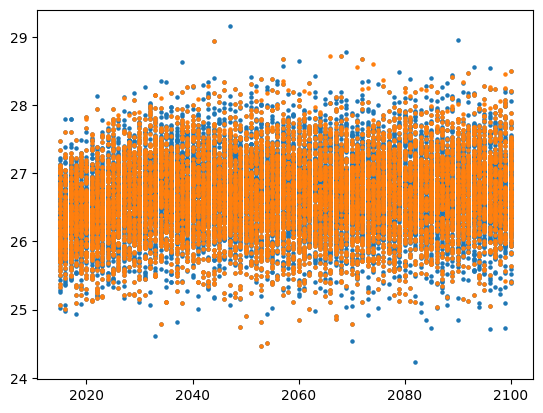

GS


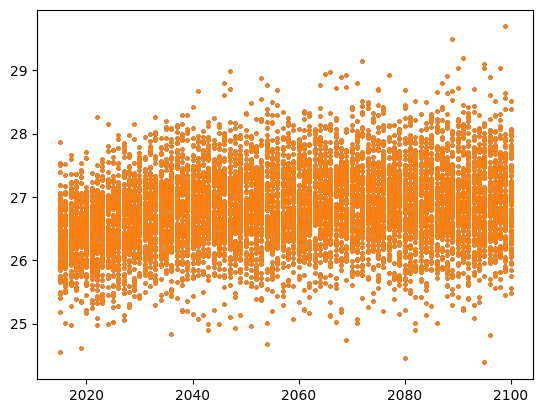

ssp534-over


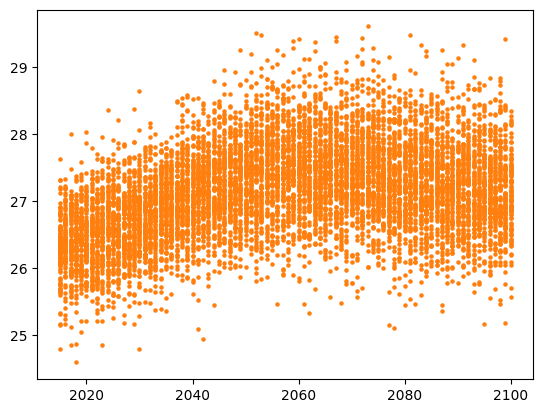

ModAct


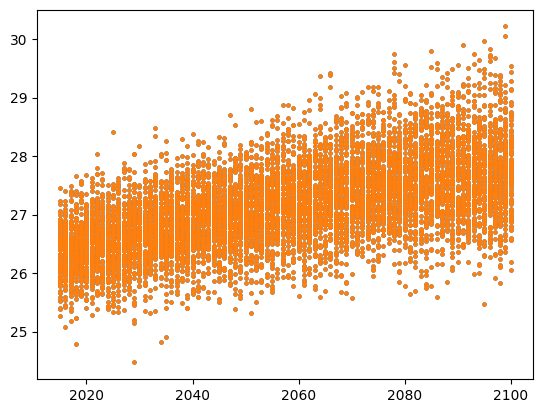

CurPol


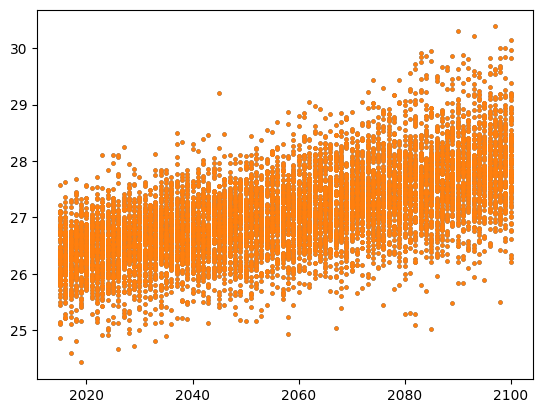

In [39]:

import matplotlib.pyplot as plt

for scenario in cset.scenarios:
    ssp_id = scenario
    print(ssp_id)
    plt.figure()
    plt.scatter(tas_new_df[(tas_new_df.run.str.contains(ssp_id)) & (tas_new_df.index == 'BGD')]['year'], 
                tas_new_df[(tas_new_df.run.str.contains(ssp_id)) & (tas_new_df.index == 'BGD')]['tas'], s = 5)
    plt.scatter(tas_old_df[(tas_old_df.run.str.contains(ssp_id)) & (tas_old_df.index == 'BGD')]['year'], 
                tas_old_df[(tas_old_df.run.str.contains(ssp_id)) & (tas_old_df.index == 'BGD')]['tas'], s = 5)
    plt.show()
